In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, Imputer, MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Set display width options
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Training Data
---

In [3]:
PATH = './ml_case_data/'

### Customer Features: Jan-16
---

In [4]:
train_data = pd.read_csv(PATH+'ml_case_training_data.csv', index_col='id')
train_data['date_activ'] = pd.to_datetime(train_data['date_activ'], format='%Y-%m-%d', errors='coerce')
train_data['date_end'] = pd.to_datetime(train_data['date_end'], format='%Y-%m-%d', errors='coerce')
train_data['date_first_activ'] = pd.to_datetime(train_data['date_first_activ'], format='%Y-%m-%d', errors='coerce')
train_data['date_modif_prod'] = pd.to_datetime(train_data['date_modif_prod'], format='%Y-%m-%d', errors='coerce')
train_data['date_renewal'] = pd.to_datetime(train_data['date_renewal'], format='%Y-%m-%d', errors='coerce')
train_data.head()

,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,NaT,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


### Preprocessing
---

In [5]:
train_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [6]:
train_data.dtypes

activity_new                        object
campaign_disc_ele                  float64
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_first_activ            datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_base_bill_ele             float64
forecast_base_bill_year            float64
forecast_bill_12m                  float64
forecast_cons                      float64
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                             object
imp_cons   

In [7]:
# Percent of missing data
train_data.isnull().sum()/len(train_data)*100.0

activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele          0.080765
margin_net_pow_ele       

In [8]:
train_data_pre = train_data.copy()
train_data_pre.campaign_disc_ele.isnull().all()

True

In [9]:
# Drop columns with >75% of missing observations
train_data_pre = train_data_pre[train_data_pre.columns[train_data_pre.isnull().mean() < 0.75]]
train_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [10]:
# Convert missing activity_new data to NA
train_data_pre.activity_new = train_data_pre.activity_new.fillna(value='NA_activity_new')
# Convert missing channel_sales data (categorical) to NA
train_data_pre.channel_sales = train_data_pre.channel_sales.fillna(value='NA_channel_sales')
# Convert missing origin_up data to NA
train_data_pre.origin_up = train_data_pre.origin_up.fillna(value='NA_origin_up')

In [11]:
# How many levels do each of the categorical variables have?
print('activity_new has %s levels' % train_data_pre.activity_new.nunique())
print('channel_sales has %s levels' % train_data_pre.channel_sales.nunique())
print('origin_up has %s levels' % train_data_pre.origin_up.nunique())
print('has_gas has %s levels' % train_data.has_gas.nunique())

activity_new has 420 levels
channel_sales has 8 levels
origin_up has 6 levels
has_gas has 2 levels


There were several options here. OHE creating dummy variables would turn this into a fairly sparse matrix given the 420+ levels. Dimensionality reduction could also have worked using PCA or t-SNE but there was a risk of throwing away a lot of data. Ultimately decided to use Label Encoding even though ordinality creeps into the results.

In [12]:
# Convert has_gas t and f responses to 0 and 1
lb = LabelBinarizer()
train_data_pre.has_gas = lb.fit_transform(train_data.has_gas)

In [13]:
# Use Label Encoder for categorical variables
activity_new_cat = pd.DataFrame(train_data_pre.activity_new.astype('category').cat.codes)
channel_sales_cat = pd.DataFrame(train_data_pre.channel_sales.astype('category').cat.codes)
origin_up_cat = pd.DataFrame(train_data_pre.origin_up.astype('category').cat.codes)
activity_new_cat.columns = ['activity_new_cat']
channel_sales_cat.columns = ['channel_sales_cat']
origin_up_cat.columns = ['origin_up_cat']
#activity_new_cat.head()

In [14]:
# Use imputation (mean) to fill in the rest of the variables
imputer = Imputer()
train_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin',
               'pow_max']] = imputer.fit_transform(train_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin','pow_max']])

In [15]:
train_data_pre.isnull().sum()/len(train_data_pre)*100.0

activity_new                0.000000
channel_sales               0.000000
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.012425
date_modif_prod             0.975398
date_renewal                0.248509
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.000000
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.000000
forecast_price_energy_p2    0.000000
forecast_price_pow_p1       0.000000
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.000000
margin_net_pow_ele          0.000000
nb_prod_act                 0.000000
net_margin                  0.000000
num_years_antig             0.000000
origin_up                   0.000000
pow_max                     0.000000
dtype: float64

### Feature Engineering
---

It's important to not introduce any features that we would not have known by the end of Jan 2016

>1. Length of the contract in days
2. How many days since the end of contract was their last renewal?
3. How many days since their last product modification?
4. Was last month's electricity consumption > average of the last 11 months?

In [16]:
# Length of the contract in days
train_data_pre['contract_length_days'] = (train_data_pre.date_end - train_data.date_activ).dt.days
train_data_pre.contract_length_days.describe()

count    16094.000000
mean      2018.156704
std        627.256689
min        365.000000
25%       1461.000000
50%       1834.000000
75%       2402.000000
max       5925.000000
Name: contract_length_days, dtype: float64

In [17]:
# How many days since the end of the contract was the last renewal?
train_data_pre['days_ago_renewed'] = (train_data_pre.date_end - train_data.date_renewal).dt.days
train_data_pre.days_ago_renewed.describe()

count    16056.000000
mean       372.901844
std         55.376169
min       -374.000000
25%        363.000000
50%        365.000000
75%        365.000000
max       1212.000000
Name: days_ago_renewed, dtype: float64

In [18]:
# How many days since the last product modification?
train_data_pre['days_since_product_mod'] = (train_data_pre.date_end - train_data.date_renewal).dt.days
train_data_pre.days_since_product_mod.describe()

count    16056.000000
mean       372.901844
std         55.376169
min       -374.000000
25%        363.000000
50%        365.000000
75%        365.000000
max       1212.000000
Name: days_since_product_mod, dtype: float64

In [19]:
# What was usage in the last month compared to average usage in the previous 11 months?
train_data_pre['cons_11M_1M'] = \
    train_data_pre.cons_last_month - (train_data_pre.cons_12m - train_data_pre.cons_last_month)/11
train_data_pre.cons_11M_1M.describe()

count    1.609600e+04
mean     3.521277e+03
std      4.099944e+04
min     -4.096960e+05
25%     -8.596818e+02
50%     -1.058182e+02
75%      6.182727e+02
max      3.487957e+06
Name: cons_11M_1M, dtype: float64

In [20]:
# Energy usage uptick
train_data_pre['cons_uptick'] = np.where(train_data_pre['cons_11M_1M'] < 0, 0, 1)
train_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,1460.0,363.0,363.0,-17179.545455,0
24011ae4ebbe3035111d65fa7c15bc57,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1096.0,358.0,358.0,0.000000,1
d29c2c54acc38ff3c0614d0a653813dd,NA_activity_new,NA_channel_sales,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2566.0,365.0,365.0,-423.636364,0
764c75f661154dac3a6c254cd082ea7d,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2192.0,365.0,365.0,-49.454545,0
bba03439a292a1e166f80264c16191cb,NA_activity_new,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2192.0,365.0,365.0,-144.000000,0


In [21]:
train_data_pre.dtypes

activity_new                        object
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                              int64
imp_cons                           float64
margin_gross_pow_ele               float64
margin_net_pow_ele                 float64
nb_prod_act                          int64
net_margin                         float64
num_years_antig                      int64
origin_up  

### Pricing Data: 2015
---

In [22]:
train_hist_data = pd.read_csv(PATH+'ml_case_training_hist_data.csv', index_col='id')
train_hist_data['price_date'] = pd.to_datetime(train_hist_data['price_date'], format='%Y-%m-%d', errors='coerce')
train_hist_data.head(20)

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


In [23]:
train_hist_data.isnull().sum()

price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [24]:
# We seem to be without any time-series data for these customers
train_hist_data[train_hist_data.price_p1_var.isnull()].tail()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN
d625f9e90d4af9986197444361e99235,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
train_hist_data.dropna(inplace=True)
train_hist_data.isnull().sum()

price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

In [26]:
train_hist_data[train_hist_data.price_p1_var.isnull()]

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,


In [27]:
# How many unique users do we have historical data for?
train_hist_data.index.nunique()

16094

In [28]:
# % of customers w/o energy pricing for p1?
(train_hist_data.groupby('id')['price_p1_var'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

0.1366969056791351

In [29]:
# Pct customers w/o energy pricing for p2?
(train_hist_data.groupby('id')['price_p2_var'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

45.047843916987695

In [30]:
# Pct customers w/o energy pricing for p3?
(train_hist_data.groupby('id')['price_p3_var'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

57.878712563688325

In [31]:
# % of customers w/o power pricing for p1?
(train_hist_data.groupby('id')['price_p1_fix'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

0.739405989809867

In [32]:
# Pct customers w/o power pricing for p2?
(train_hist_data.groupby('id')['price_p2_fix'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

57.959488007953276

In [33]:
# Pct customers w/o power pricing for p3?
(train_hist_data.groupby('id')['price_p3_fix'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

57.959488007953276

In [34]:
train_hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


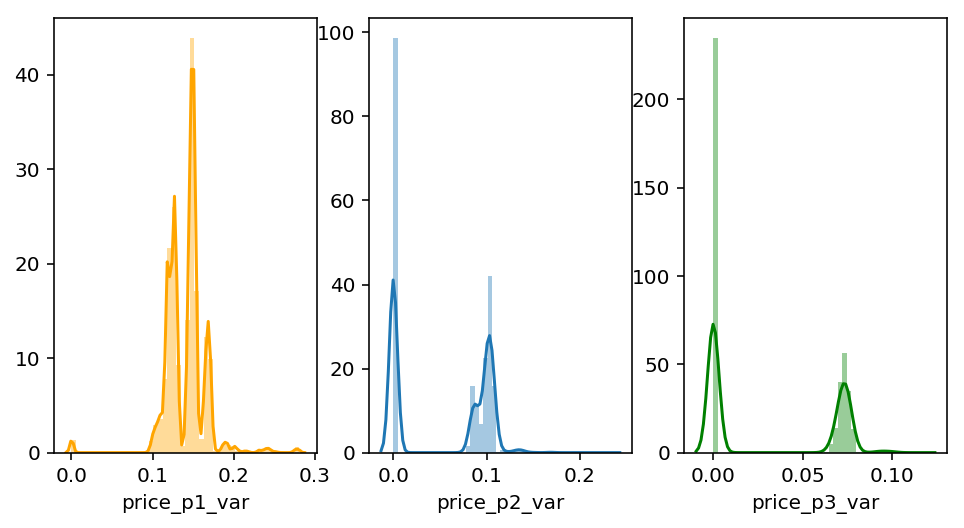

In [35]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(8,4))
ax1 = sns.distplot(train_hist_data.price_p1_var.dropna(), ax=ax1, color='orange')
# where available
ax2 = sns.distplot(train_hist_data.price_p2_var.dropna(), ax=ax2)
# where available
ax3 = sns.distplot(train_hist_data.price_p3_var.dropna(), ax=ax3, color='green')
plt.show()

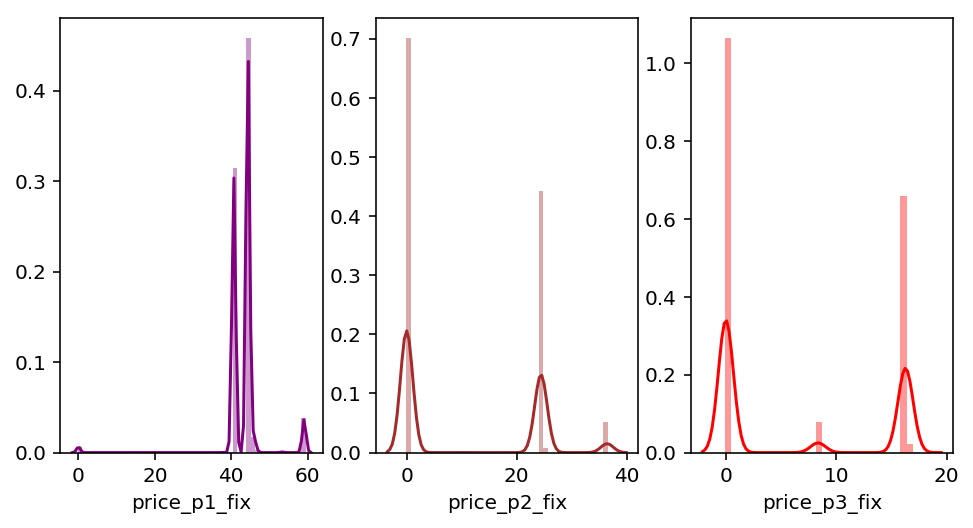

In [36]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(8,4))
ax1 = sns.distplot(train_hist_data.price_p1_fix.dropna(), ax=ax1, color='purple')
# where available
ax2 = sns.distplot(train_hist_data.price_p2_fix.dropna(), ax=ax2, color='brown')
# where available
ax3 = sns.distplot(train_hist_data.price_p3_fix.dropna(), ax=ax3, color='red')
plt.show()

In [37]:
# Does customer have multiple pricing levels
train_hist_data_pre = train_hist_data.copy()
train_hist_data_pre['energy_p1_mean'] = train_hist_data.groupby('id')['price_p1_var'].mean()
train_hist_data_pre['energy_p2_mean'] = train_hist_data.groupby('id')['price_p2_var'].mean()
train_hist_data_pre['energy_p3_mean'] = train_hist_data.groupby('id')['price_p3_var'].mean()
train_hist_data_pre['power_p1_mean'] = train_hist_data.groupby('id')['price_p1_fix'].mean()
train_hist_data_pre['power_p2_mean'] = train_hist_data.groupby('id')['price_p2_fix'].mean()
train_hist_data_pre['power_p3_mean'] = train_hist_data.groupby('id')['price_p3_fix'].mean()
train_hist_data_pre.head()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean
id,,,,,,,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0


In [38]:
train_hist_data_pre.index.nunique()

16094

In [39]:
train_hist_data_pre = train_hist_data_pre.groupby(['id'])[['energy_p1_mean', 'energy_p2_mean', 'energy_p3_mean',
                                    'power_p1_mean', 'power_p2_mean', 'power_p3_mean']].mean()

In [40]:
train_hist_data_pre.shape

(16094, 6)

In [41]:
# Multiple energy levels or multiple power levels?
train_hist_data_pre['multiple_energy_levels'] = \
np.where((train_hist_data_pre.energy_p2_mean == 0)|(train_hist_data_pre.energy_p3_mean == 0), 0, 1)
train_hist_data_pre['multiple_power_levels'] = \
np.where((train_hist_data_pre.power_p2_mean == 0)|(train_hist_data_pre.power_p3_mean == 0), 0, 1)
train_hist_data_pre.head()

,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels
id,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,1,1
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0,0
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0,0
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,1,1
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0,0


### Churn Data: Mar-16
---

In [42]:
train_churn_data = pd.read_csv(PATH+'ml_case_training_output.csv', index_col='id')
train_churn_data.head()

,churn
id,
48ada52261e7cf58715202705a0451c9,0
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0


In [43]:
train_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16096 entries, 48ada52261e7cf58715202705a0451c9 to 563dde550fd624d7352f3de77c0cdfcd
Data columns (total 1 columns):
churn    16096 non-null int64
dtypes: int64(1)
memory usage: 251.5+ KB


In [44]:
pct_Churn = train_churn_data.sum()/len(train_churn_data)
pct_Churn*100.0

churn    9.909294
dtype: float64

In [168]:
train_churn_data.churn.value_counts()

0    14501
1     1595
Name: churn, dtype: int64

In [169]:
14501/1595

9.09153605015674

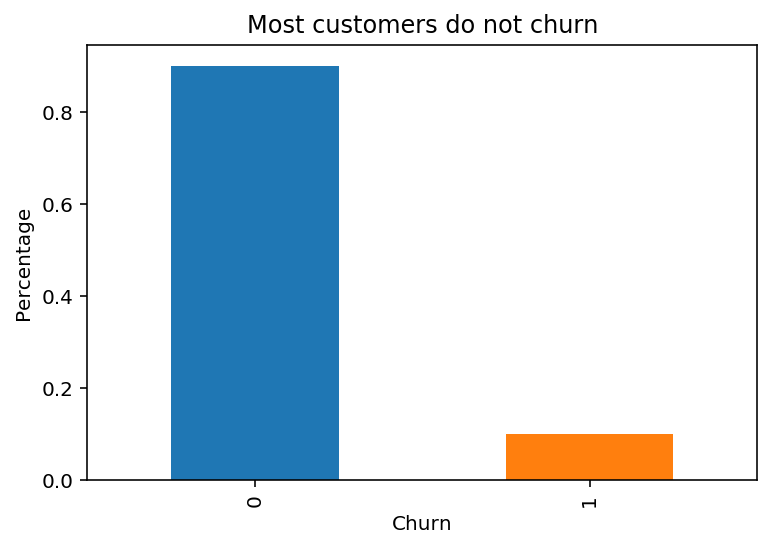

In [45]:
fig, ax = plt.subplots()
ax = train_churn_data.churn.value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentage')
plt.title('Most customers do not churn')
plt.show()

### Scaling Variables
---
Standardize trainind datasets into a scale between 0 and 1 before using them together.

In [46]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [47]:
train_data_pre_scaled = normalize(train_data_pre.drop(['activity_new', 'channel_sales', 'origin_up','date_activ', 'date_end', 'date_modif_prod',
       'date_renewal'], axis=1))

In [48]:
train_data_pre_scaled.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick
id,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,0.026787,0.000725,0.021903,0.358612,0.36648,0.0,0.226866,0.350117,0.450808,0.992466,0.0,0.409867,0.537426,0.579521,0.000000,0.204785,0.133333,0.358717,0.196942,0.464691,0.464691,0.100706,0.0
24011ae4ebbe3035111d65fa7c15bc57,0.007722,0.013834,0.019737,0.138510,0.32807,0.0,0.092193,0.417870,0.500788,0.683750,1.0,0.375325,0.612078,0.647380,0.032258,0.168107,0.133333,0.085467,0.131475,0.461538,0.461538,0.105114,1.0
d29c2c54acc38ff3c0614d0a653813dd,0.008010,0.000725,0.019737,0.140087,0.32807,0.0,0.097651,0.531864,0.000000,0.745944,0.0,0.375325,0.602013,0.638231,0.000000,0.145123,0.333333,0.025651,0.395863,0.465952,0.465952,0.105005,0.0
764c75f661154dac3a6c254cd082ea7d,0.007756,0.000725,0.019737,0.138908,0.32807,0.0,0.106108,0.605169,0.448521,0.745944,0.0,0.375325,0.615588,0.650571,0.000000,0.144695,0.333333,0.025764,0.328597,0.465952,0.465952,0.105101,0.0
bba03439a292a1e166f80264c16191cb,0.007820,0.000725,0.019737,0.140502,0.32807,0.0,0.098992,0.535452,0.000000,0.745944,0.0,0.375325,0.617388,0.652206,0.000000,0.145352,0.333333,0.024449,0.328597,0.465952,0.465952,0.105077,0.0


In [49]:
train_hist_data_scaled = normalize(train_hist_data_pre)
train_hist_data_scaled.head()

,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels
id,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.446043,0.528818,0.710629,0.684699,0.669240,0.967999,1.0,1.0
0004351ebdd665e6ee664792efc4fd13,0.525280,0.000000,0.000000,0.746668,0.000000,0.000000,0.0,0.0
0010bcc39e42b3c2131ed2ce55246e3c,0.651310,0.000000,0.000000,0.762384,0.000000,0.000000,0.0,0.0
0010ee3855fdea87602a5b7aba8e42de,0.426021,0.500789,0.670529,0.683785,0.668347,0.966707,1.0,1.0
00114d74e963e47177db89bc70108537,0.530659,0.000000,0.000000,0.744674,0.000000,0.000000,0.0,0.0


In [50]:
activity_new_norm = normalize(activity_new_cat)
origin_up_norm = normalize(origin_up_cat)
channel_sales_norm = normalize(channel_sales_cat)

### Merge DataFrames
---
>1. Consumer Features
2. Aggregate Time Series Data
3. OHE and Label Encoded Variables
4. Customer churn

In [51]:
train_data_pre_scaled.shape

(16096, 23)

In [52]:
activity_new_norm.shape

(16096, 1)

In [53]:
origin_up_norm.shape

(16096, 1)

In [54]:
channel_sales_norm.shape

(16096, 1)

In [55]:
activity_new_norm.head()

,activity_new_cat
id,
48ada52261e7cf58715202705a0451c9,0.291169
24011ae4ebbe3035111d65fa7c15bc57,0.000000
d29c2c54acc38ff3c0614d0a653813dd,0.000000
764c75f661154dac3a6c254cd082ea7d,0.000000
bba03439a292a1e166f80264c16191cb,0.000000


In [56]:
origin_up_norm.head()

,origin_up_cat
id,
48ada52261e7cf58715202705a0451c9,0.6
24011ae4ebbe3035111d65fa7c15bc57,0.8
d29c2c54acc38ff3c0614d0a653813dd,0.4
764c75f661154dac3a6c254cd082ea7d,0.4
bba03439a292a1e166f80264c16191cb,0.4


In [57]:
channel_sales_norm.head()

,channel_sales_cat
id,
48ada52261e7cf58715202705a0451c9,0.714286
24011ae4ebbe3035111d65fa7c15bc57,0.571429
d29c2c54acc38ff3c0614d0a653813dd,0.000000
764c75f661154dac3a6c254cd082ea7d,0.571429
bba03439a292a1e166f80264c16191cb,0.714286


In [58]:
merged_df = pd.concat([train_data_pre_scaled, origin_up_norm, channel_sales_norm, activity_new_norm, train_churn_data], axis=1)
merged_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick,origin_up_cat,channel_sales_cat,activity_new_cat,churn
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,0.026787,0.000725,0.021903,0.358612,0.36648,0.0,0.226866,0.350117,0.450808,0.992466,0.0,0.409867,0.537426,0.579521,0.000000,0.204785,0.133333,0.358717,0.196942,0.464691,0.464691,0.100706,0.0,0.6,0.714286,0.291169,0
24011ae4ebbe3035111d65fa7c15bc57,0.007722,0.013834,0.019737,0.138510,0.32807,0.0,0.092193,0.417870,0.500788,0.683750,1.0,0.375325,0.612078,0.647380,0.032258,0.168107,0.133333,0.085467,0.131475,0.461538,0.461538,0.105114,1.0,0.8,0.571429,0.000000,1
d29c2c54acc38ff3c0614d0a653813dd,0.008010,0.000725,0.019737,0.140087,0.32807,0.0,0.097651,0.531864,0.000000,0.745944,0.0,0.375325,0.602013,0.638231,0.000000,0.145123,0.333333,0.025651,0.395863,0.465952,0.465952,0.105005,0.0,0.4,0.000000,0.000000,0
764c75f661154dac3a6c254cd082ea7d,0.007756,0.000725,0.019737,0.138908,0.32807,0.0,0.106108,0.605169,0.448521,0.745944,0.0,0.375325,0.615588,0.650571,0.000000,0.144695,0.333333,0.025764,0.328597,0.465952,0.465952,0.105101,0.0,0.4,0.571429,0.000000,0
bba03439a292a1e166f80264c16191cb,0.007820,0.000725,0.019737,0.140502,0.32807,0.0,0.098992,0.535452,0.000000,0.745944,0.0,0.375325,0.617388,0.652206,0.000000,0.145352,0.333333,0.024449,0.328597,0.465952,0.465952,0.105077,0.0,0.4,0.714286,0.000000,0


In [59]:
merged_df.shape

(16096, 27)

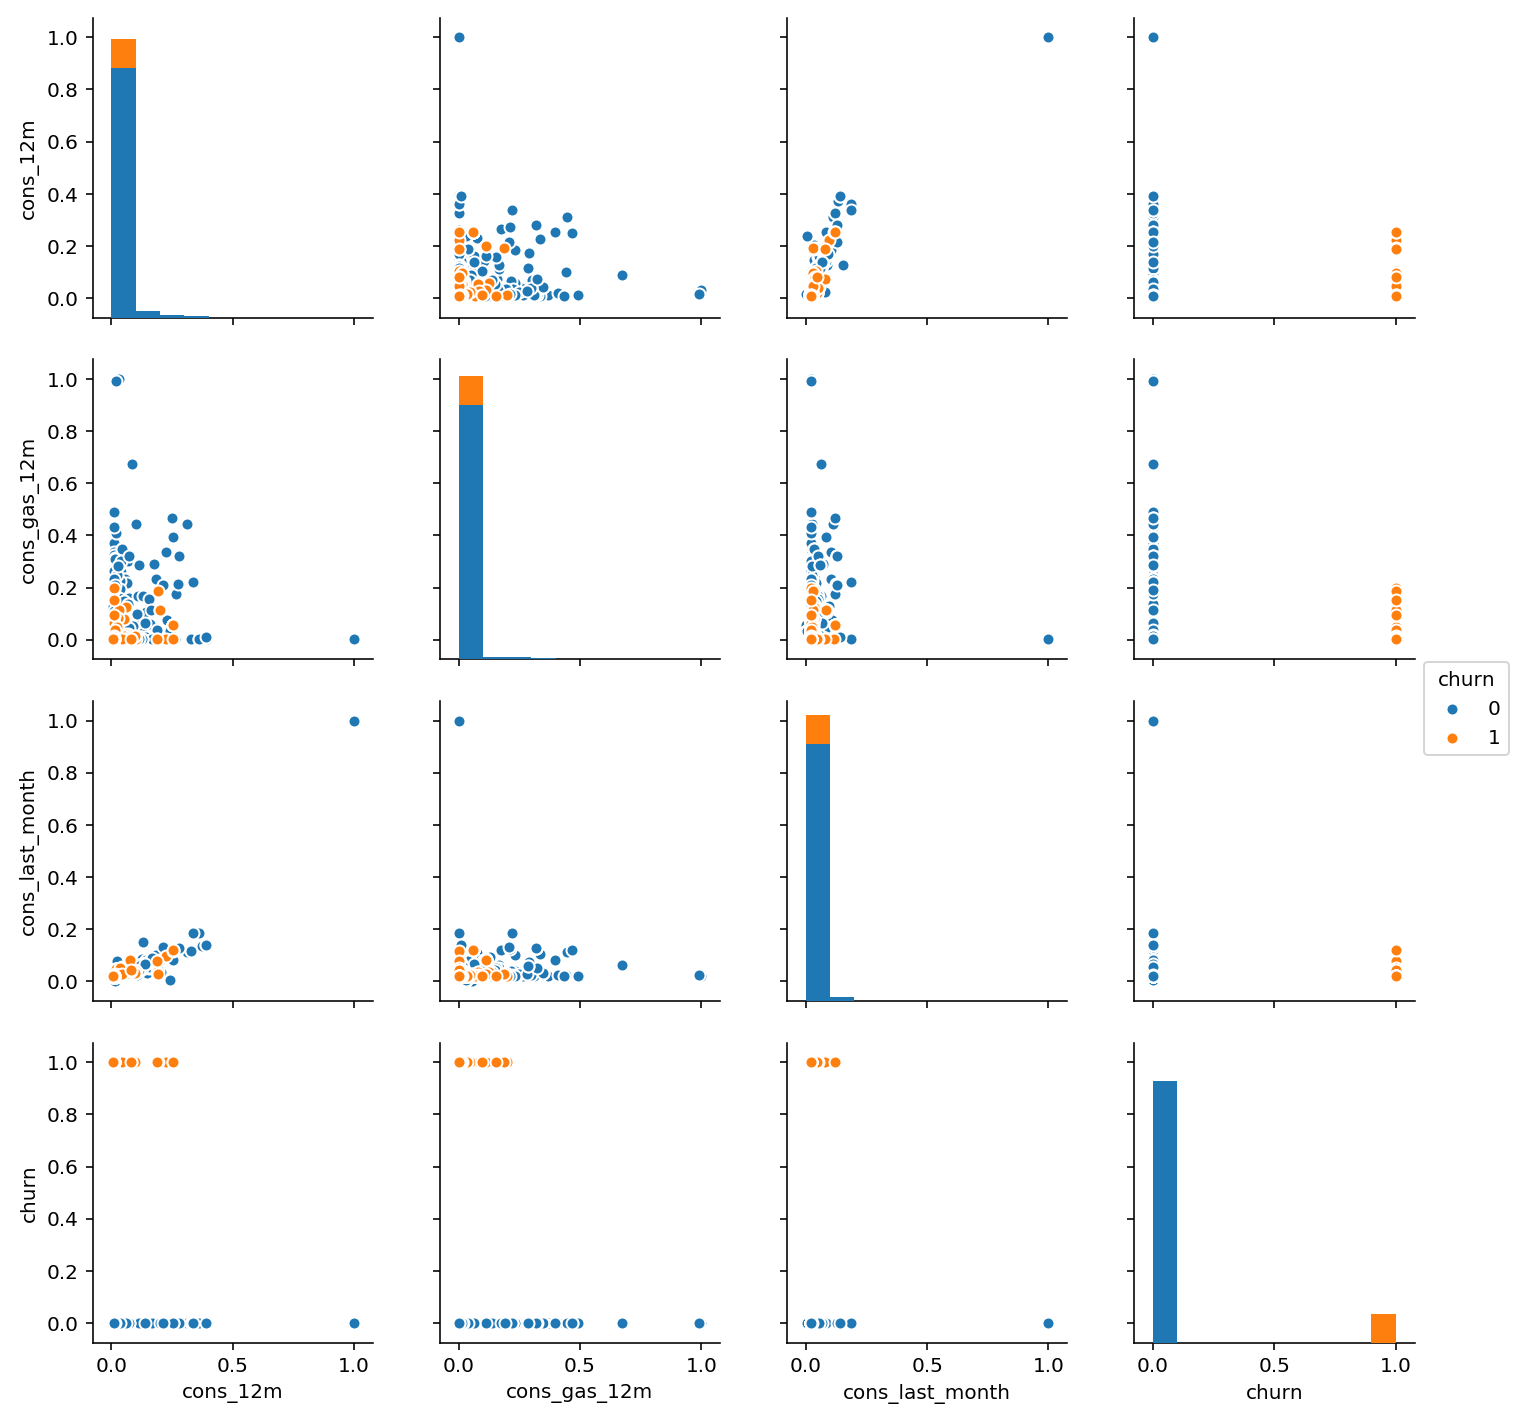

In [60]:
sns.pairplot(merged_df[['cons_12m','cons_gas_12m','cons_last_month', 'churn']].dropna(), hue='churn')
plt.show()

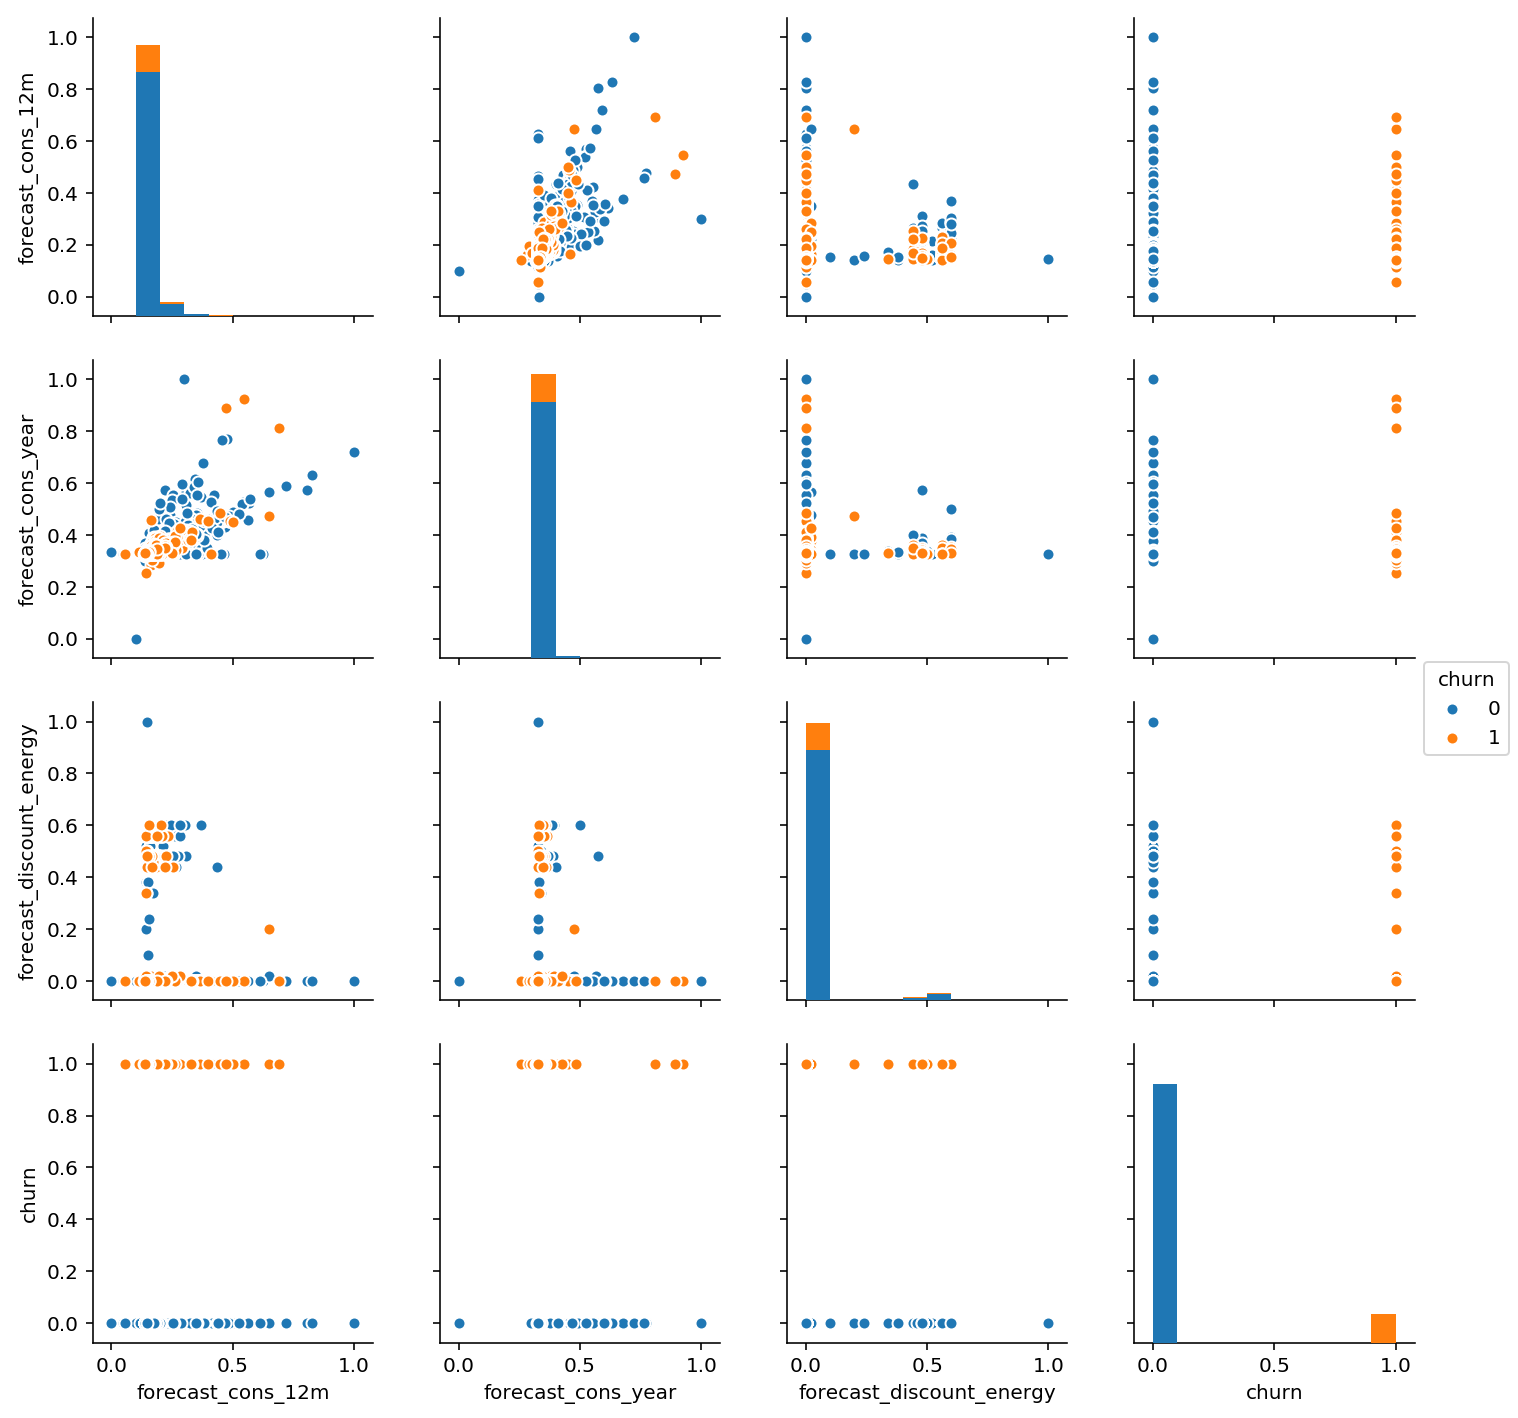

In [61]:
sns.pairplot(merged_df[['forecast_cons_12m','forecast_cons_year','forecast_discount_energy','churn']].dropna(), hue='churn')
plt.show()

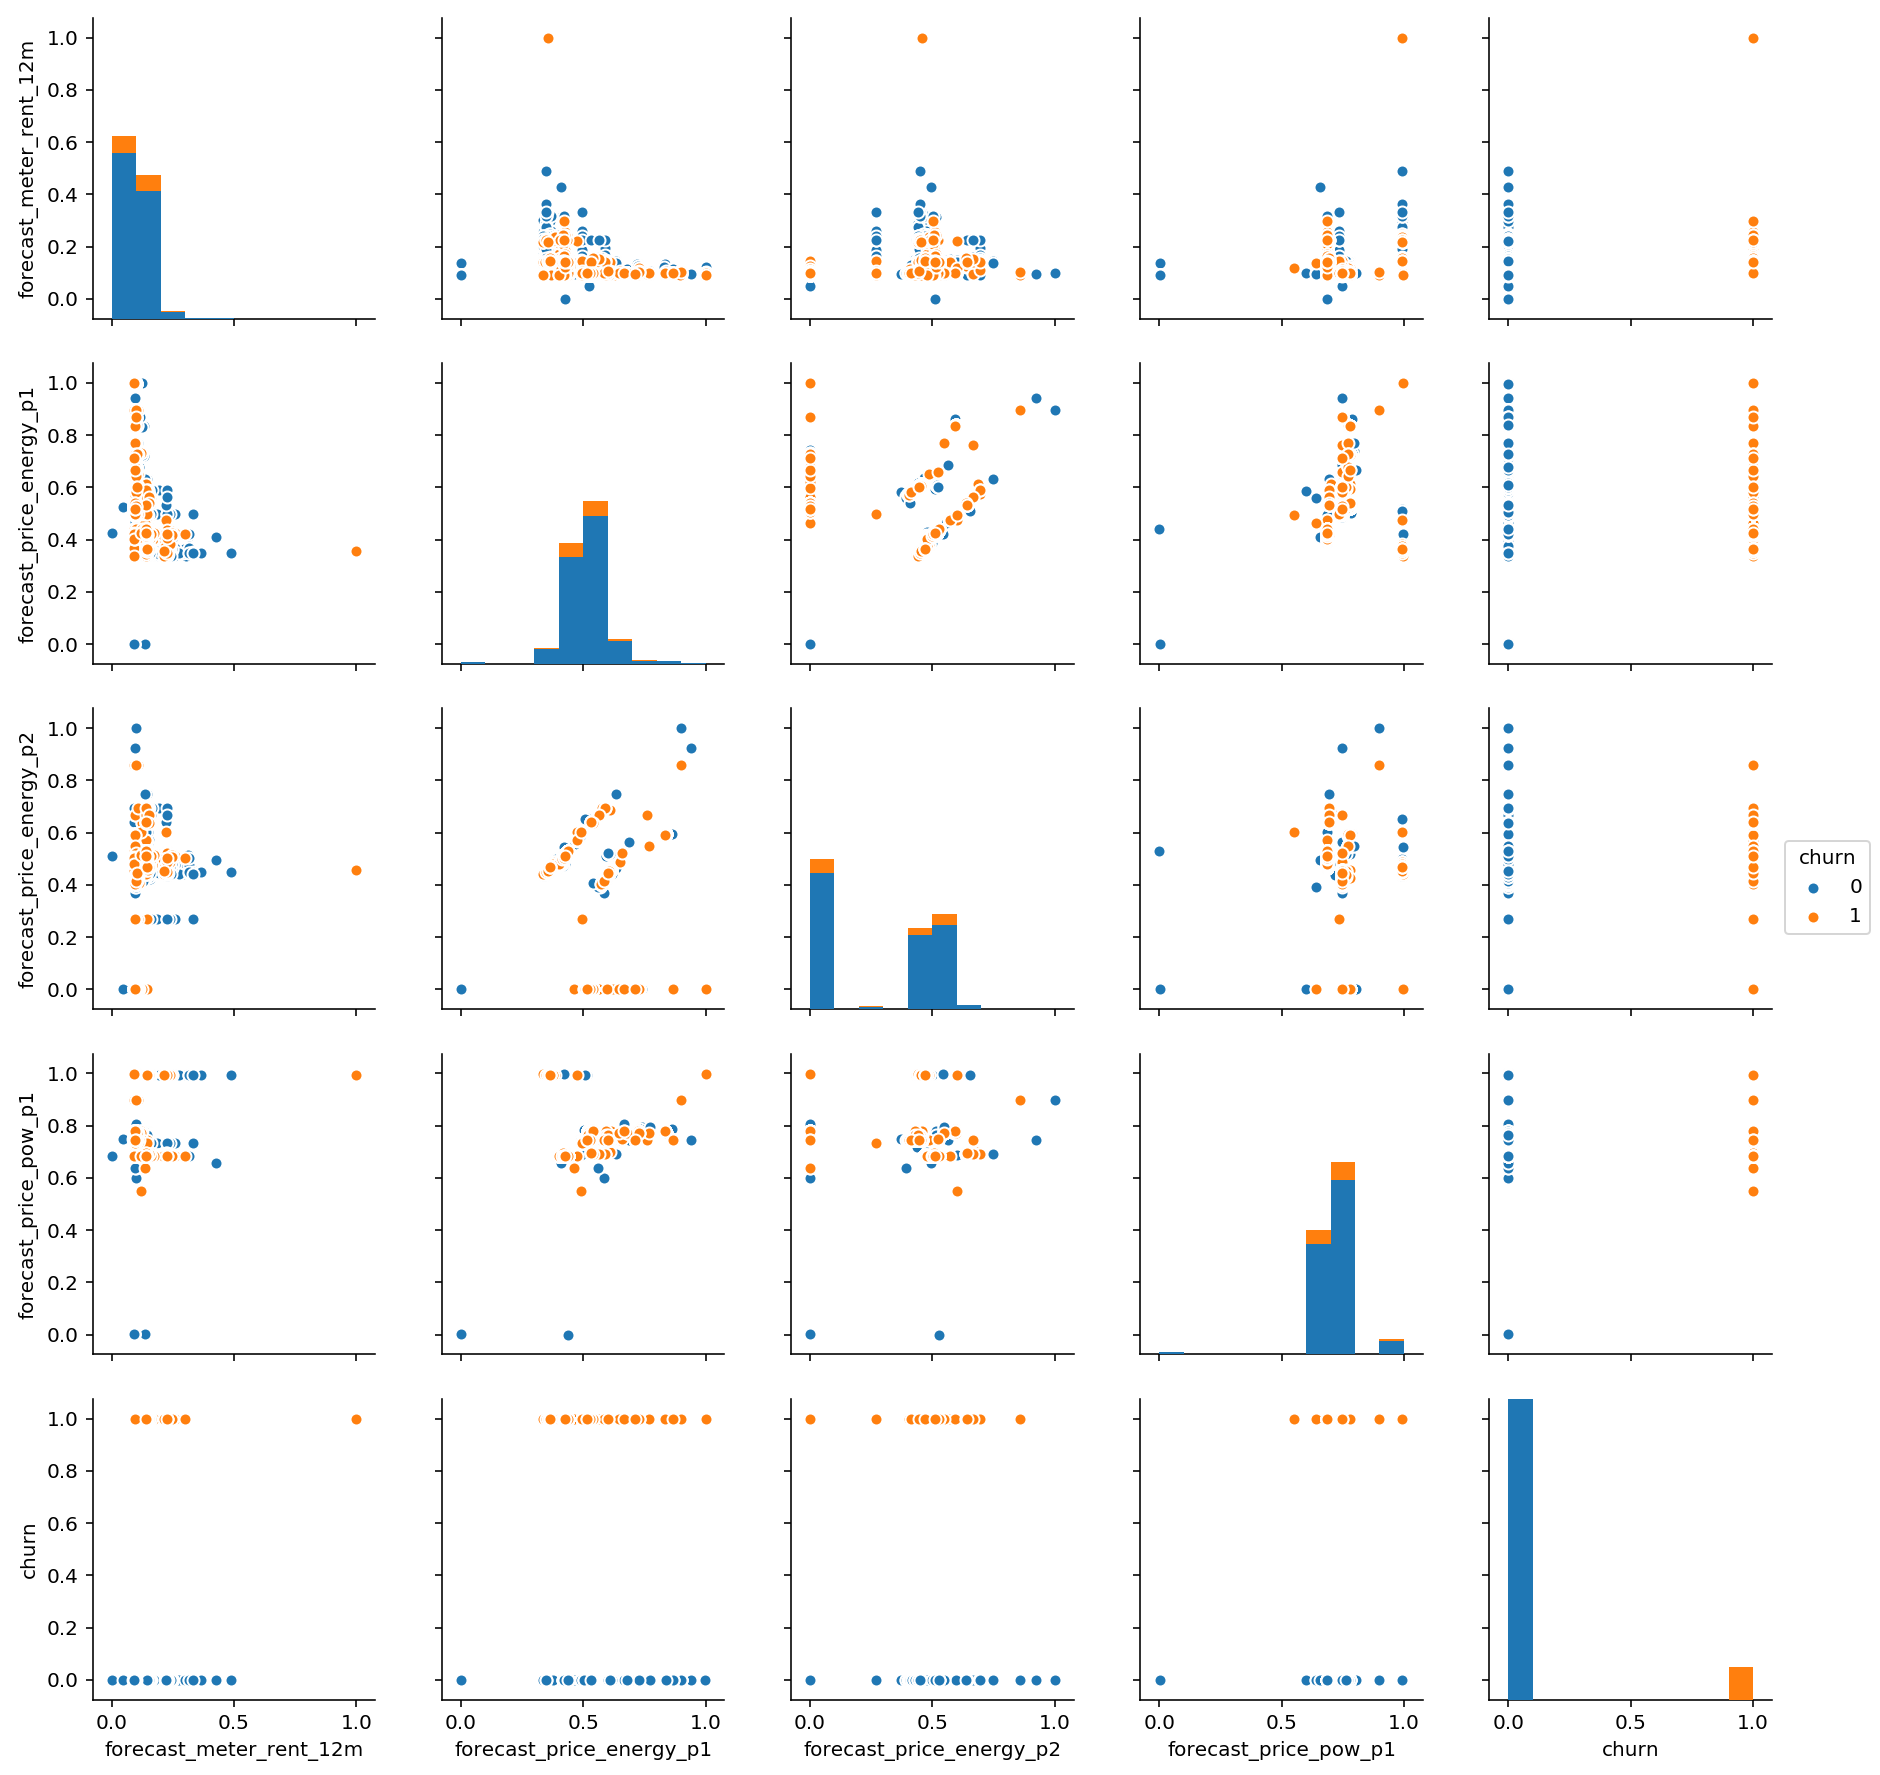

In [62]:
sns.pairplot(merged_df[['forecast_meter_rent_12m','forecast_price_energy_p1','forecast_price_energy_p2', 'forecast_price_pow_p1','churn']].dropna(), hue='churn')
plt.show()

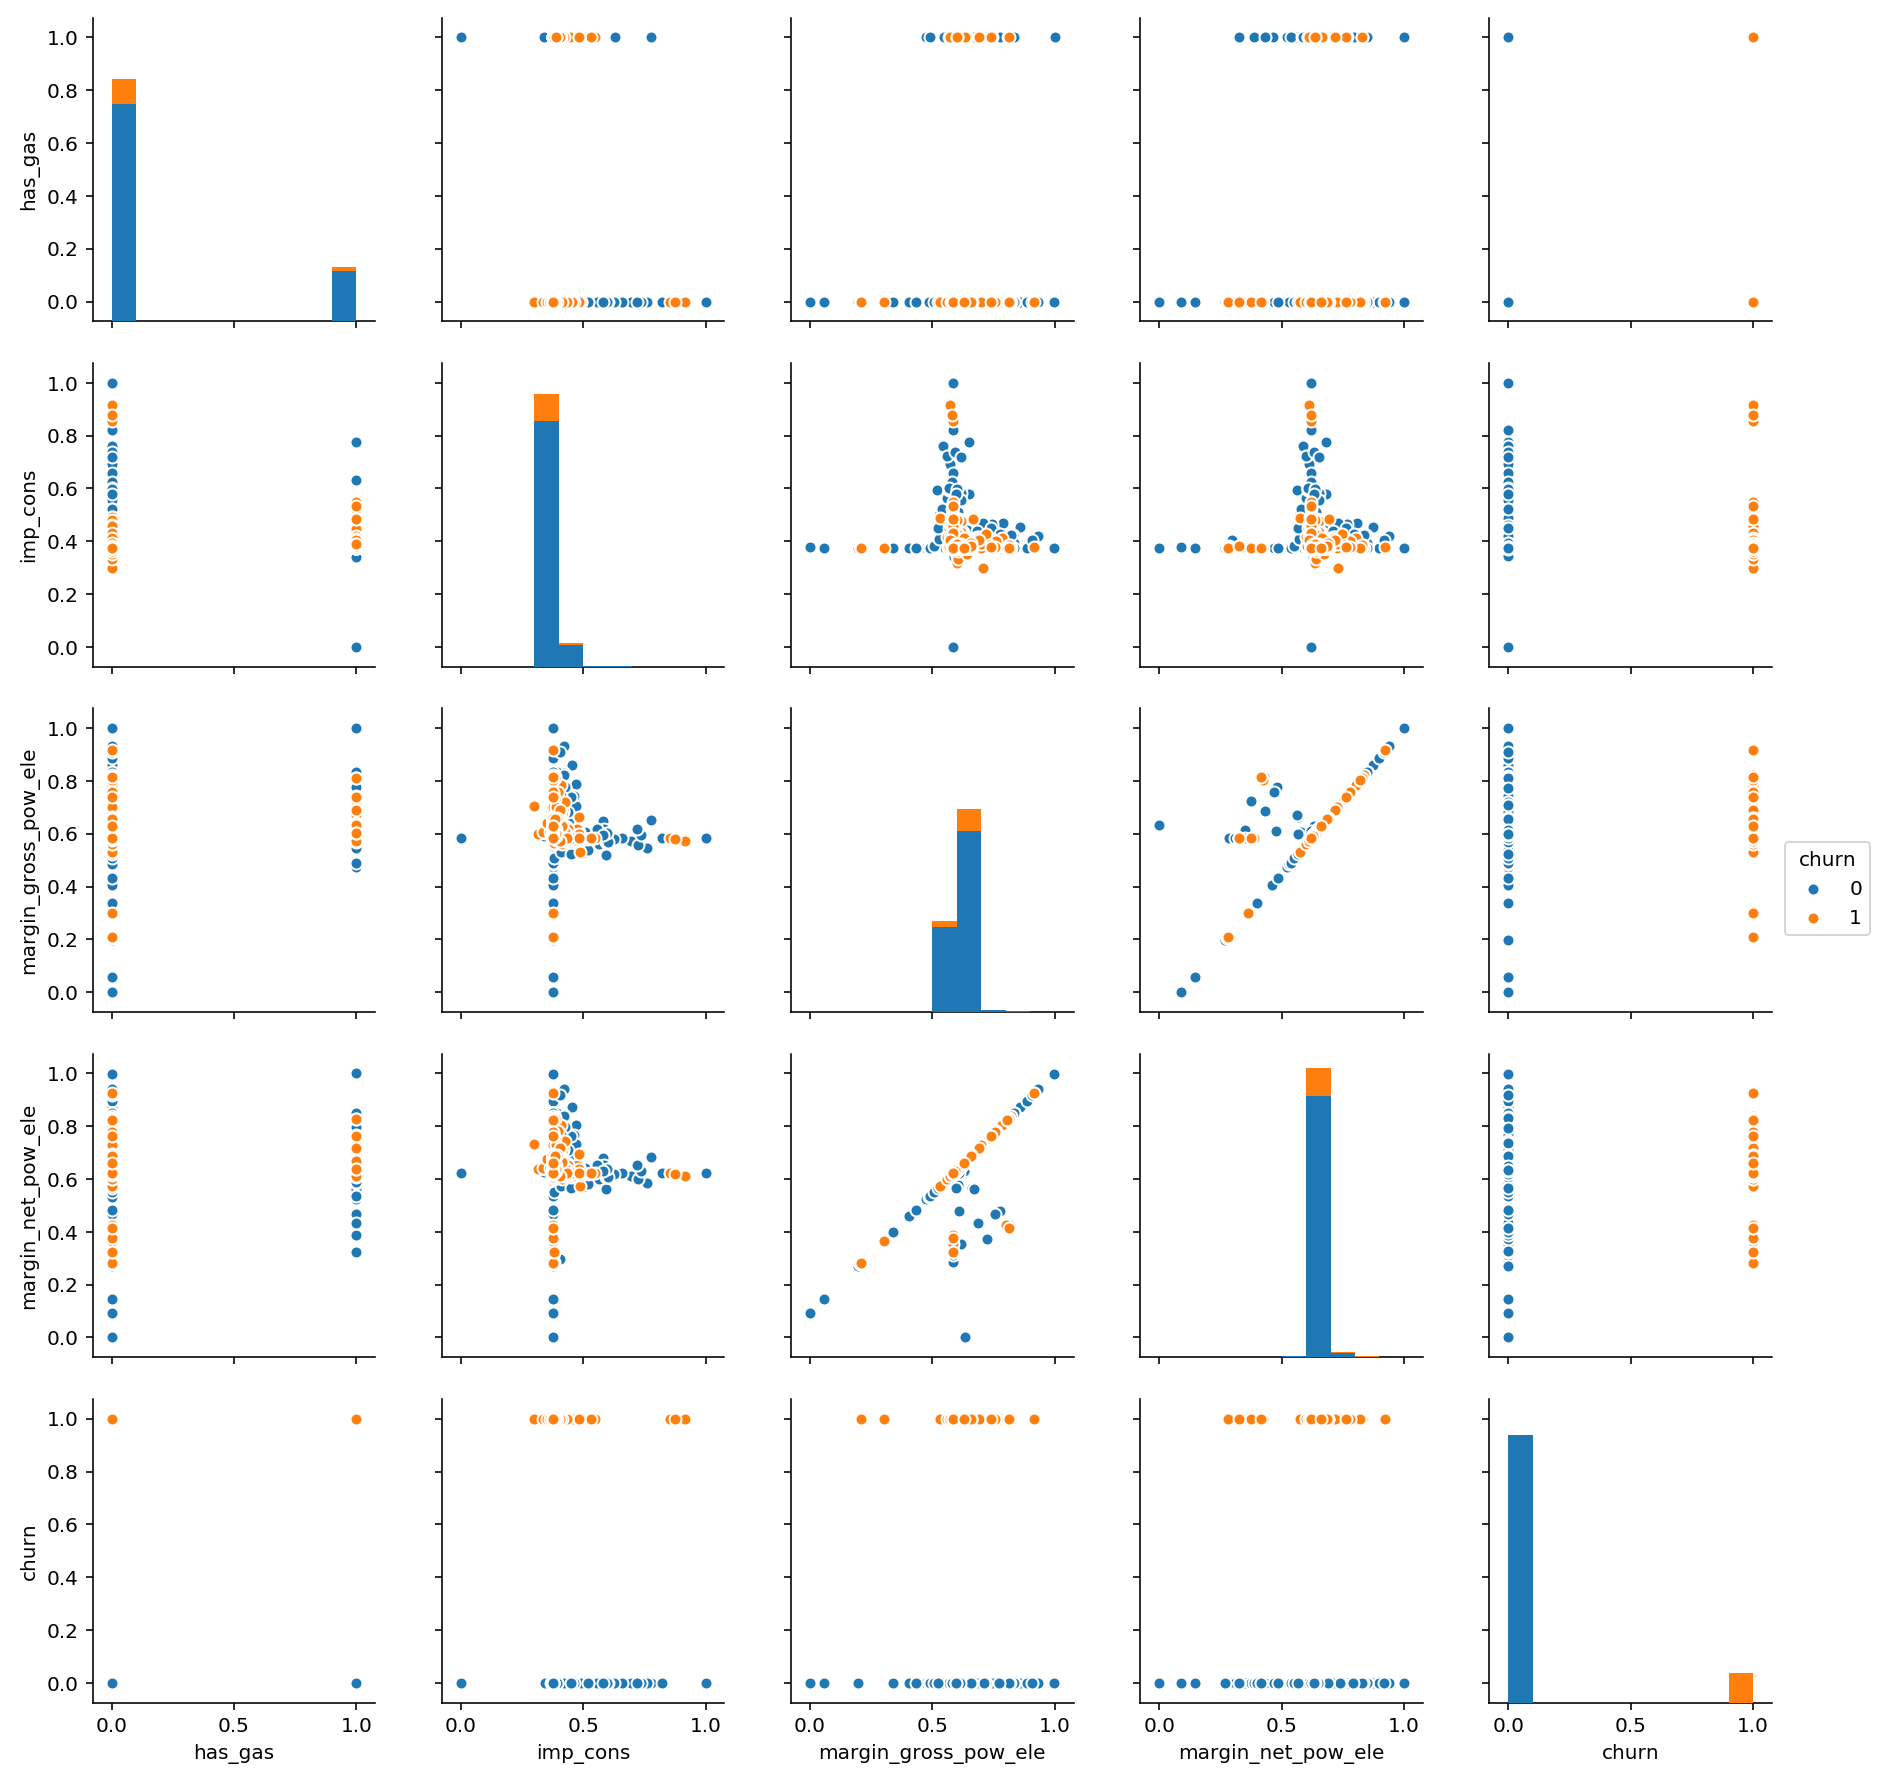

In [63]:
sns.pairplot(merged_df[['has_gas','imp_cons','margin_gross_pow_ele', 'margin_net_pow_ele','churn']].dropna(), hue='churn')
plt.show()

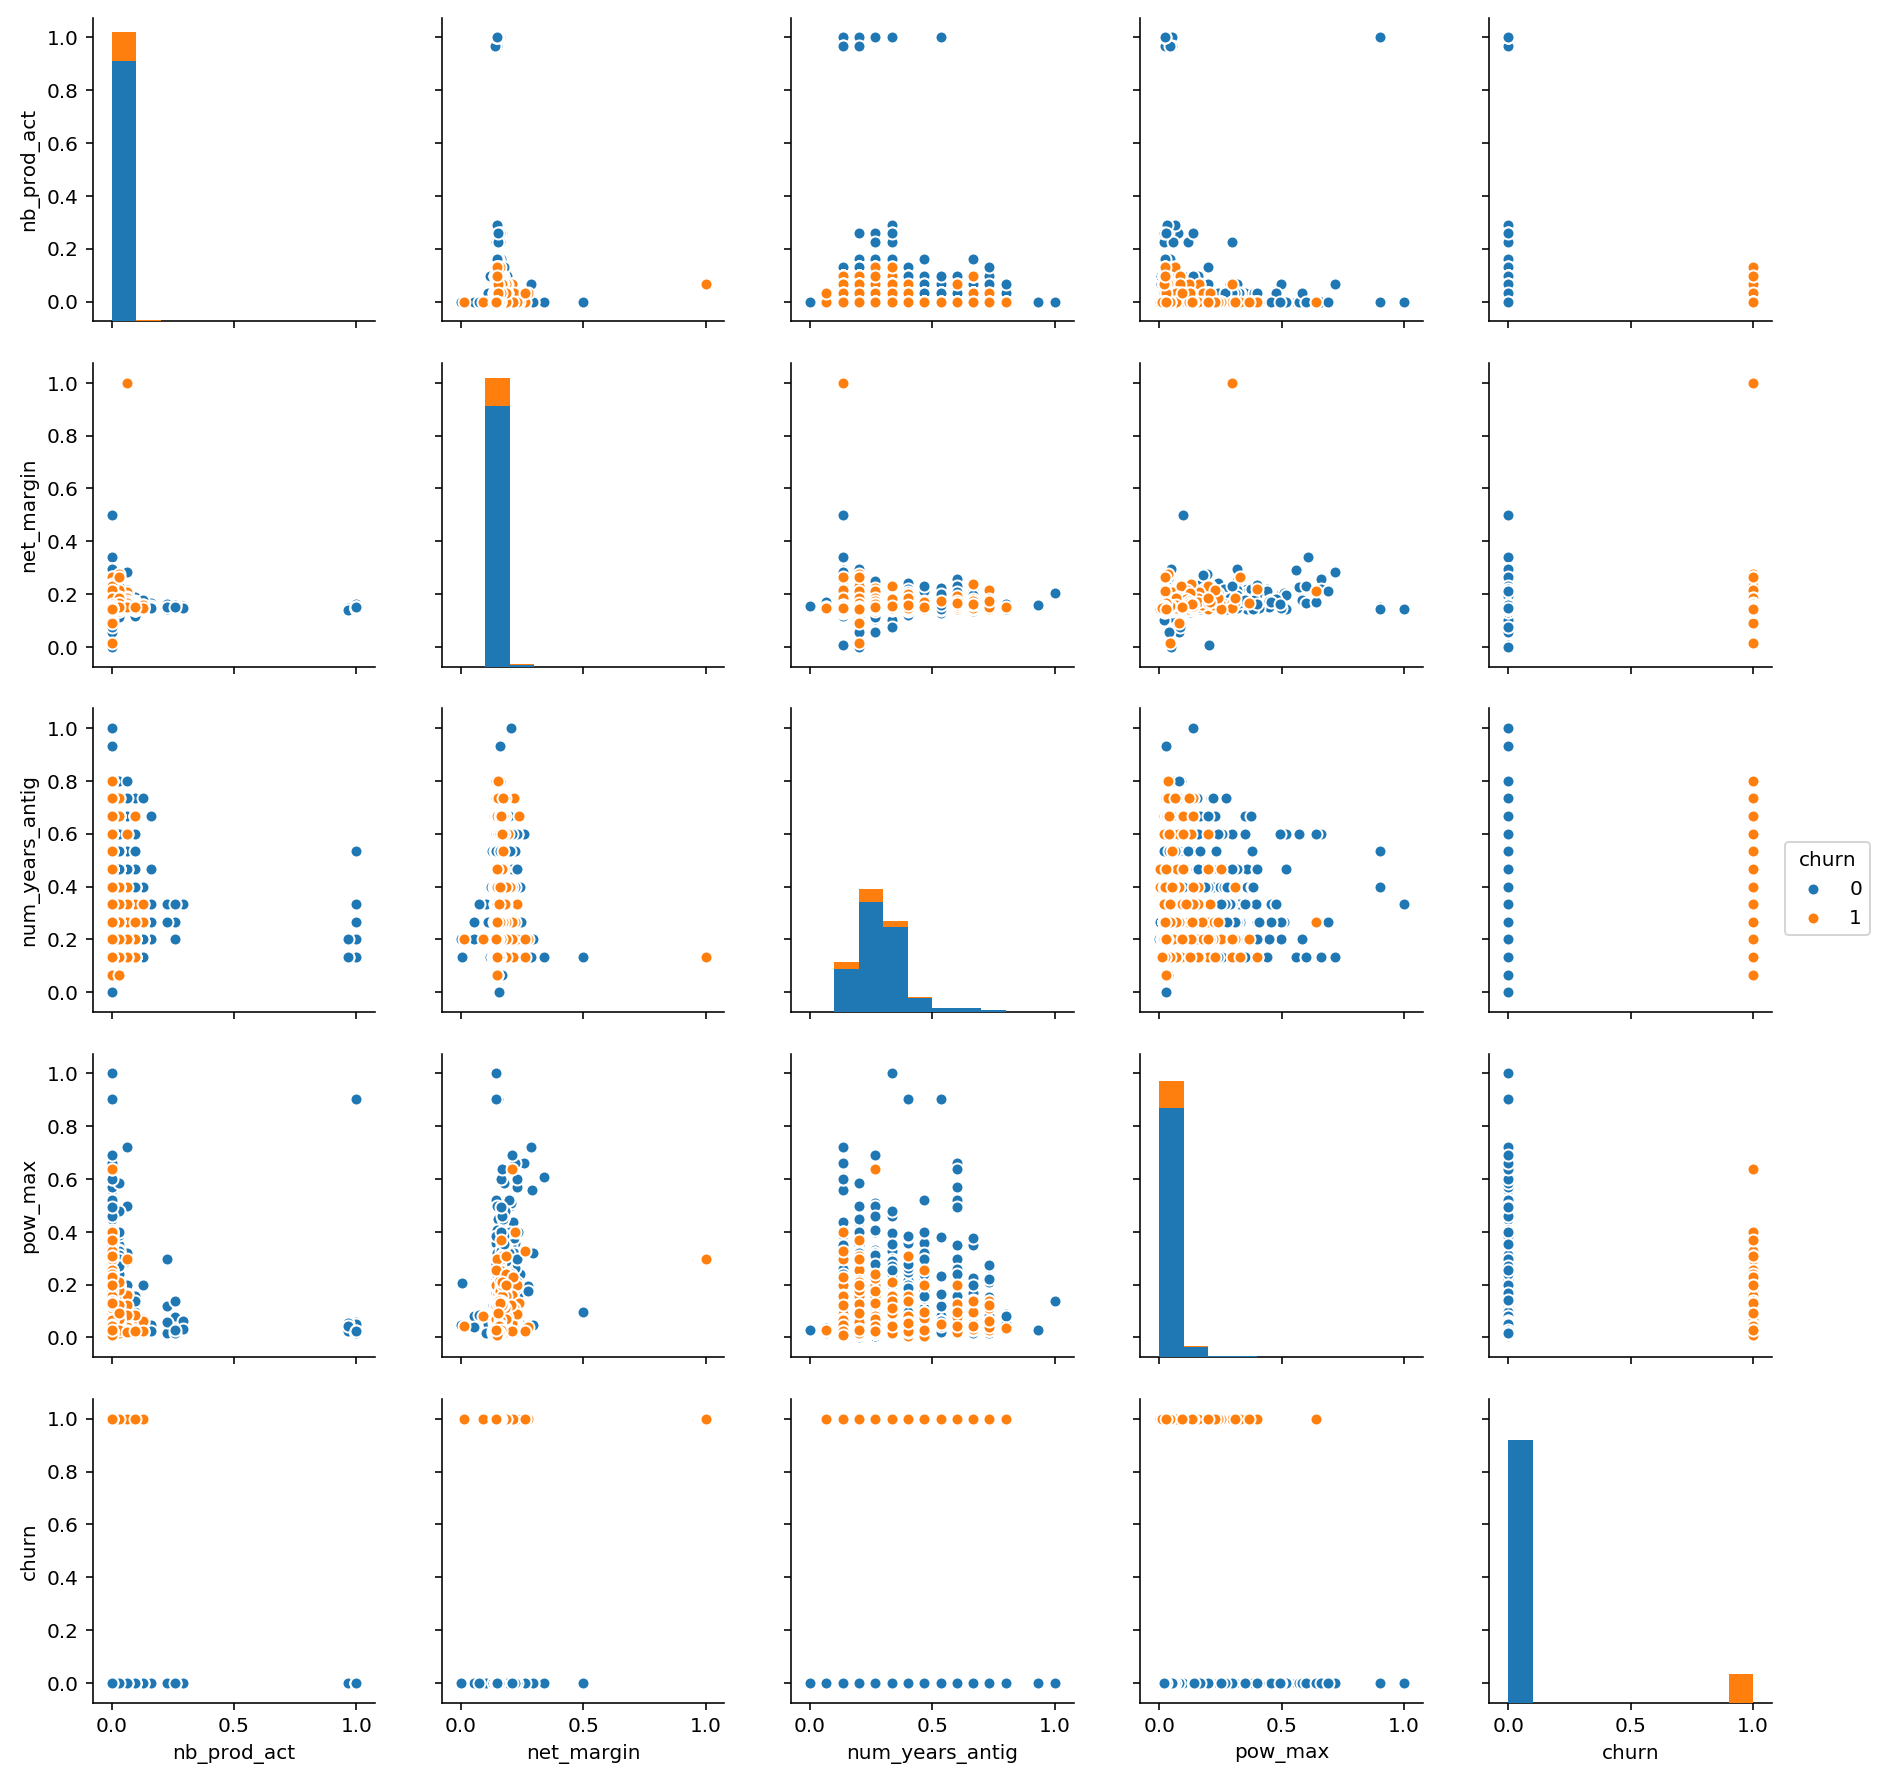

In [64]:
sns.pairplot(merged_df[['nb_prod_act','net_margin','num_years_antig', 'pow_max','churn']].dropna(), hue='churn')
plt.show()

### Logistic Churn Model
---

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [66]:
X = merged_df.drop(['churn'], axis=1).fillna(0)
y = merged_df.churn

In [67]:
# Hypertuning Parameters with 5 fold CV 
lr_gridsearch = GridSearchCV(LogisticRegression(), 
                             param_grid={'penalty' : ['l1','l2'],
                                        'C' : [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10]},
                            cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
lr_gridsearch.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [68]:
lr_gridsearch.best_score_

0.6469298159454749

In [69]:
lr_gridsearch.best_params_

{'C': 5, 'penalty': 'l1'}

In [70]:
# 5 fold cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5, random_state=123)
model = LogisticRegression(C=5, penalty='l1')
results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
print(results.mean())

0.6466644222453365


### Decision Tree Churn Model
---

In [71]:
# Hypertuning Parameters with 5 fold CV 
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5], 
                                  'criterion': ['gini', 'entropy'],
                                 # Lets go for 1, 2, 3 min samples left
                                 'min_samples_leaf': [1,2,3],
                                  # Dont bother splitting unless you have < x elements
                                  'min_samples_split': [2,3,4,5,6]}, verbose=1,
                                    cv=5, scoring='roc_auc')
grid.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   46.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [72]:
grid.best_score_

0.6343386310458448

In [73]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [74]:
# 5 fold cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5, random_state=123)
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_leaf=1, min_samples_split=2)
results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
print(results.mean())

0.6290382974552334


### Random Forest Churn Model
---

In [75]:
# Hypertuning Parameters with 5 fold CV# Hypert 
forest_grid = GridSearchCV(RandomForestClassifier(), 
                      param_grid = {'max_depth': [1,2,3,4,5,6,7], 
                        'criterion': ['gini', 'entropy'],
                      'min_samples_leaf': [1,2,3,4],
                      'min_samples_split': [2,3,4]},
                        cv=5, verbose=1, scoring='roc_auc')
forest_grid.fit(X, y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [76]:
forest_grid.best_score_

0.6779916398669209

In [77]:
forest_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [78]:
# 5 Fold Cross with optimal parameters
kfold = KFold(n_splits=5, random_state=123)
cart = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4, min_samples_split=3)
rf_results = cross_val_score(cart, X, y, cv=kfold, scoring='roc_auc')
print(rf_results.mean())

0.6668605409937449


### XGBoost Classifier
---

In [156]:
# Hypertuning parameters for 5 fold cross validation split
param = {
 'n_estimators':[50,100],#150,200,300,400],
 'max_depth':[2,3,4,5,6,7,8,9],
 'min_child_weight':[2,3],#4,5],
 'colsample_bytree':[0.2,0.6,0.8]
#'colsample_bylevel':[0.2,0.6,0.8]
}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
xgb_grid.fit(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits






[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [2, 3], 'colsample_bytree': [0.2, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [157]:
xgb_grid.best_score_

0.7089120125541377

In [158]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 50}

In [160]:
# 5 Fold Cross with optimal parameters
kfold = KFold(n_splits = 5, random_state=123)
xgb_model = XGBClassifier(colsample_bytree=0.8, max_depth=8, min_child_weight=2, n_estimators=50)
xgb_results = cross_val_score(xgb_model, X, y, cv=kfold, scoring='roc_auc')
print(xgb_results.mean())

0.706336638593554


### Neural Network Classifier
---

In [87]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from tqdm import tqdm

# Create a neural network function to pass it on to the Keras Classifier
def build_neural_network(hidden_units=10):
    nn_model = Sequential()
    nn_model.add(Dense(hidden_units, input_dim=26, kernel_initializer='random_normal',activation='relu'))
    nn_model.add(Dense(1, input_dim=hidden_units, kernel_initializer='random_normal',activation='sigmoid'))
    nn_model.compile(loss='binary_crossentropy', optimizer='adam')
    return nn_model

nn_model = KerasClassifier(build_fn=build_neural_network, epochs=300)

# 5 Fold Cross Validation
nn_results = cross_val_score(nn_model, X, y, cv=kfold, scoring='roc_auc')

Epoch 1/300
12876/12876 [==============================] - 1s 87us/step - loss: 0.3923
Epoch 2/300
12876/12876 [==============================] - 1s 47us/step - loss: 0.3207
Epoch 3/300
12876/12876 [==============================] - 1s 56us/step - loss: 0.3195
Epoch 4/300
12876/12876 [==============================] - 1s 64us/step - loss: 0.3186
Epoch 5/300
12876/12876 [==============================] - 1s 43us/step - loss: 0.3176
Epoch 6/300
12876/12876 [==============================] - 1s 42us/step - loss: 0.3169: 0s - loss: 0.3
Epoch 7/300
12876/12876 [==============================] - 1s 41us/step - loss: 0.3164
Epoch 8/300
12876/12876 [==============================] - 1s 42us/step - loss: 0.3158
Epoch 9/300
12876/12876 [==============================] - 1s 41us/step - loss: 0.3150: 0s - loss: 0.3
Epoch 10/300
12876/12876 [==============================] - 1s 41us/step - loss: 0.3150
Epoch 11/300
12876/12876 [==============================] - 1s 40us/step - loss: 0.3146
Epoch 12/

12876/12876 [==============================] - 1s 50us/step - loss: 0.3121
Epoch 91/300
12876/12876 [==============================] - 1s 49us/step - loss: 0.3119
Epoch 92/300
12876/12876 [==============================] - 1s 53us/step - loss: 0.3118: 0s - loss: 0
Epoch 93/300
12876/12876 [==============================] - 1s 49us/step - loss: 0.3119
Epoch 94/300
12876/12876 [==============================] - 1s 51us/step - loss: 0.3120
Epoch 95/300
12876/12876 [==============================] - 1s 48us/step - loss: 0.3119: 0s - loss: 0.307 - ETA: 0s - loss: 
Epoch 96/300
12876/12876 [==============================] - 1s 48us/step - loss: 0.3118
Epoch 97/300
12876/12876 [==============================] - 1s 47us/step - loss: 0.3119
Epoch 98/300
12876/12876 [==============================] - 1s 55us/step - loss: 0.3117
Epoch 99/300
12876/12876 [==============================] - 1s 54us/step - loss: 0.3119
Epoch 100/300
12876/12876 [==============================] - 1s 53us/step - loss: 

12876/12876 [==============================] - 1s 46us/step - loss: 0.3112: 0s - loss:  - ETA: 0s - loss: 0.30
Epoch 180/300
12876/12876 [==============================] - 1s 47us/step - loss: 0.3112
Epoch 181/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3112
Epoch 182/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3112
Epoch 183/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3111
Epoch 184/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3112
Epoch 185/300
12876/12876 [==============================] - 1s 47us/step - loss: 0.3111: 0s - loss:
Epoch 186/300
12876/12876 [==============================] - 1s 47us/step - loss: 0.3111
Epoch 187/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3114: 0s - loss: 0.311
Epoch 188/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3113: 0s - loss: 0.310
Epoch 189/300
12876/12876 [=============

12876/12876 [==============================] - 1s 45us/step - loss: 0.3102
Epoch 267/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3104
Epoch 268/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3105
Epoch 269/300
12876/12876 [==============================] - 1s 47us/step - loss: 0.3104
Epoch 270/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3103
Epoch 271/300
12876/12876 [==============================] - 1s 45us/step - loss: 0.3103
Epoch 272/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3105
Epoch 273/300
12876/12876 [==============================] - 1s 45us/step - loss: 0.3106
Epoch 274/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3101
Epoch 275/300
12876/12876 [==============================] - 1s 46us/step - loss: 0.3103
Epoch 276/300
12876/12876 [==============================] - 1s 45us/step - loss: 0.3104
Epoch 277/300
12876/12876 [========

12877/12877 [==============================] - 1s 46us/step - loss: 0.3147
Epoch 57/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3148
Epoch 58/300
12877/12877 [==============================] - 1s 47us/step - loss: 0.3147
Epoch 59/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3149: 0s - loss: 0.31
Epoch 60/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3148
Epoch 61/300
12877/12877 [==============================] - 1s 48us/step - loss: 0.3148: 0s - loss: 0.3
Epoch 62/300
12877/12877 [==============================] - 1s 49us/step - loss: 0.3147
Epoch 63/300
12877/12877 [==============================] - 1s 48us/step - loss: 0.3147
Epoch 64/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3146
Epoch 65/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3149
Epoch 66/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3145: 0s - loss: 

12877/12877 [==============================] - 1s 46us/step - loss: 0.3138
Epoch 147/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3141
Epoch 148/300
12877/12877 [==============================] - 1s 45us/step - loss: 0.3138: 0s - loss: 0.31
Epoch 149/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3139: 0s - loss: 0.314
Epoch 150/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3139: 0s - loss: 
Epoch 151/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3137
Epoch 152/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3139: 0s - loss: 
Epoch 153/300
12877/12877 [==============================] - 1s 45us/step - loss: 0.3135
Epoch 154/300
12877/12877 [==============================] - 1s 47us/step - loss: 0.3138
Epoch 155/300
12877/12877 [==============================] - 1s 50us/step - loss: 0.3139
Epoch 156/300
12877/12877 [==============================] - 1s

12877/12877 [==============================] - 1s 47us/step - loss: 0.3128
Epoch 235/300
12877/12877 [==============================] - 1s 45us/step - loss: 0.3130
Epoch 236/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3129
Epoch 237/300
12877/12877 [==============================] - 1s 43us/step - loss: 0.3129
Epoch 238/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3129: 0s - loss: 0
Epoch 239/300
12877/12877 [==============================] - 1s 45us/step - loss: 0.3129
Epoch 240/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3128
Epoch 241/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3130
Epoch 242/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3128
Epoch 243/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3128: 0s - loss: 0.310
Epoch 244/300
12877/12877 [==============================] - 1s 43us/step - loss: 0.3129: 0s

12877/12877 [==============================] - 1s 43us/step - loss: 0.3150
Epoch 25/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3148
Epoch 26/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3147
Epoch 27/300
12877/12877 [==============================] - 1s 43us/step - loss: 0.3148
Epoch 28/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3145: 0s - loss: 0.316
Epoch 29/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3148
Epoch 30/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3148
Epoch 31/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3145
Epoch 32/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3145
Epoch 33/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3144
Epoch 34/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3144
Epoch 35/300
12877/12877 [=

12877/12877 [==============================] - 1s 41us/step - loss: 0.3135
Epoch 116/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3137
Epoch 117/300
12877/12877 [==============================] - 1s 47us/step - loss: 0.3135
Epoch 118/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3136
Epoch 119/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3134
Epoch 120/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3135
Epoch 121/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3135
Epoch 122/300
12877/12877 [==============================] - 1s 49us/step - loss: 0.3135
Epoch 123/300
12877/12877 [==============================] - 1s 47us/step - loss: 0.3135
Epoch 124/300
12877/12877 [==============================] - 1s 51us/step - loss: 0.3136
Epoch 125/300
12877/12877 [==============================] - 1s 50us/step - loss: 0.3136: 0s - loss: 
Epoch 126/300
12877/12

12877/12877 [==============================] - 1s 43us/step - loss: 0.3128
Epoch 206/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3129
Epoch 207/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3131
Epoch 208/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3130
Epoch 209/300
12877/12877 [==============================] - 1s 46us/step - loss: 0.3130
Epoch 210/300
12877/12877 [==============================] - 1s 39us/step - loss: 0.3128
Epoch 211/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3130
Epoch 212/300
12877/12877 [==============================] - 1s 50us/step - loss: 0.3129
Epoch 213/300
12877/12877 [==============================] - 1s 44us/step - loss: 0.3129
Epoch 214/300
12877/12877 [==============================] - 1s 43us/step - loss: 0.3132
Epoch 215/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3132
Epoch 216/300
12877/12877 [========

12877/12877 [==============================] - 1s 42us/step - loss: 0.3124
Epoch 296/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3121
Epoch 297/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3120
Epoch 298/300
12877/12877 [==============================] - 1s 43us/step - loss: 0.3120
Epoch 299/300
12877/12877 [==============================] - 1s 40us/step - loss: 0.3119
Epoch 300/300
12877/12877 [==============================] - 1s 39us/step - loss: 0.3122
Epoch 1/300
12877/12877 [==============================] - 1s 73us/step - loss: 0.3885
Epoch 2/300
12877/12877 [==============================] - 1s 51us/step - loss: 0.3230
Epoch 3/300
12877/12877 [==============================] - 1s 41us/step - loss: 0.3213
Epoch 4/300
12877/12877 [==============================] - 1s 42us/step - loss: 0.3200
Epoch 5/300
12877/12877 [==============================] - 1s 40us/step - loss: 0.3190
Epoch 6/300
12877/12877 [====================

12877/12877 [==============================] - 1s 60us/step - loss: 0.3123
Epoch 86/300
12877/12877 [==============================] - 1s 65us/step - loss: 0.3123
Epoch 87/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3121
Epoch 88/300
12877/12877 [==============================] - 1s 60us/step - loss: 0.3122
Epoch 89/300
12877/12877 [==============================] - 1s 62us/step - loss: 0.3123: 0s - lo
Epoch 90/300
12877/12877 [==============================] - 1s 60us/step - loss: 0.3121: 0s - loss: 0.3
Epoch 91/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3121
Epoch 92/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3121
Epoch 93/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3120
Epoch 94/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3120
Epoch 95/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3121: 0s - loss:
Epoch 96

12877/12877 [==============================] - 1s 53us/step - loss: 0.3111
Epoch 175/300
12877/12877 [==============================] - 1s 51us/step - loss: 0.3112
Epoch 176/300
12877/12877 [==============================] - 1s 51us/step - loss: 0.3111
Epoch 177/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3111
Epoch 178/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3114
Epoch 179/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3112
Epoch 180/300
12877/12877 [==============================] - 1s 83us/step - loss: 0.3111
Epoch 181/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3112
Epoch 182/300
12877/12877 [==============================] - 1s 51us/step - loss: 0.3111
Epoch 183/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3106
Epoch 184/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3109
Epoch 185/300
12877/12877 [========

12877/12877 [==============================] - 1s 57us/step - loss: 0.3102
Epoch 264/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3104
Epoch 265/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3100
Epoch 266/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3099
Epoch 267/300
12877/12877 [==============================] - 1s 72us/step - loss: 0.3102
Epoch 268/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3104
Epoch 269/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3102: 0s - loss: 
Epoch 270/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3102
Epoch 271/300
12877/12877 [==============================] - 1s 63us/step - loss: 0.3099: 0s - loss: 0.
Epoch 272/300
12877/12877 [==============================] - 1s 59us/step - loss: 0.3103
Epoch 273/300
12877/12877 [==============================] - 1s 61us/step - loss: 0.3103
Epoch 2

12877/12877 [==============================] - 1s 55us/step - loss: 0.3147
Epoch 55/300
12877/12877 [==============================] - 1s 69us/step - loss: 0.3146
Epoch 56/300
12877/12877 [==============================] - 1s 63us/step - loss: 0.3147
Epoch 57/300
12877/12877 [==============================] - 1s 63us/step - loss: 0.3147: 0s
Epoch 58/300
12877/12877 [==============================] - 1s 58us/step - loss: 0.3145
Epoch 59/300
12877/12877 [==============================] - 1s 62us/step - loss: 0.3147
Epoch 60/300
12877/12877 [==============================] - 1s 67us/step - loss: 0.3146
Epoch 61/300
12877/12877 [==============================] - 1s 62us/step - loss: 0.3146
Epoch 62/300
12877/12877 [==============================] - 1s 65us/step - loss: 0.3146
Epoch 63/300
12877/12877 [==============================] - 1s 65us/step - loss: 0.3146
Epoch 64/300
12877/12877 [==============================] - 1s 66us/step - loss: 0.3146
Epoch 65/300
12877/12877 [===============

12877/12877 [==============================] - 1s 55us/step - loss: 0.3140
Epoch 146/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3140
Epoch 147/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3139: 0s - loss: 
Epoch 148/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3138
Epoch 149/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3142
Epoch 150/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3142
Epoch 151/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3141
Epoch 152/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3140
Epoch 153/300
12877/12877 [==============================] - 1s 61us/step - loss: 0.3140: 0s - loss: 0.314
Epoch 154/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3140
Epoch 155/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3136
Epoc

Epoch 236/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3136
Epoch 237/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3135
Epoch 238/300
12877/12877 [==============================] - 1s 68us/step - loss: 0.3134
Epoch 239/300
12877/12877 [==============================] - 1s 58us/step - loss: 0.3135
Epoch 240/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3137
Epoch 241/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3137
Epoch 242/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3135
Epoch 243/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3136
Epoch 244/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3134
Epoch 245/300
12877/12877 [==============================] - 1s 59us/step - loss: 0.3135
Epoch 246/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3136
Epoch 247/300
12877/1

In [88]:
print(nn_results.mean())

0.6337475971917059


## Test Data
---

In [90]:
test_data = pd.read_csv(PATH+'ml_case_test_data.csv', index_col='id')
test_data['date_activ'] = pd.to_datetime(test_data['date_activ'], format='%Y-%m-%d', errors='coerce')
test_data['date_end'] = pd.to_datetime(test_data['date_end'], format='%Y-%m-%d', errors='coerce')
test_data['date_first_activ'] = pd.to_datetime(test_data['date_first_activ'], format='%Y-%m-%d', errors='coerce')
test_data['date_modif_prod'] = pd.to_datetime(test_data['date_modif_prod'], format='%Y-%m-%d', errors='coerce')
test_data['date_renewal'] = pd.to_datetime(test_data['date_renewal'], format='%Y-%m-%d', errors='coerce')
test_data.head()

,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2011-09-06,2016-09-06,NaT,2015-08-27,2015-09-07,NaN,NaN,NaN,NaN,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2010-12-13,2016-12-31,NaT,2010-12-13,2016-01-01,NaN,NaN,NaN,NaN,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2010-09-04,2016-09-04,NaT,2015-08-27,2015-09-05,NaN,NaN,NaN,NaN,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,NaN,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2011-01-03,2017-01-03,NaT,2011-01-03,2016-01-04,NaN,NaN,NaN,NaN,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
c7c8ee9daf2a864d159d45a2373ada72,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2011-10-07,2016-10-07,NaT,2015-08-27,2015-10-09,NaN,NaN,NaN,NaN,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


### Preprocessing
---

In [91]:
test_data.shape

(4024, 31)

In [92]:
# Percent of missing data
test_data.isnull().sum()/len(test_data)*100.0

activity_new                 58.499006
campaign_disc_ele           100.000000
channel_sales                26.242545
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.000000
date_first_activ             78.205765
date_modif_prod               1.118290
date_renewal                  0.099404
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.596421
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.596421
forecast_price_energy_p2      0.596421
forecast_price_pow_p1         0.596421
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele          0.049702
margin_net_pow_ele       

In [94]:
test_data_pre = test_data.copy()
test_data_pre.campaign_disc_ele.isnull().all()

True

In [95]:
# Drop columns with >75% of missing observations
test_data_pre = test_data_pre[test_data_pre.columns[test_data_pre.isnull().mean() < 0.75]]
test_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,
ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2011-09-06,2016-09-06,2015-08-27,2015-09-07,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2010-12-13,2016-12-31,2010-12-13,2016-01-01,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2010-09-04,2016-09-04,2015-08-27,2015-09-05,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2011-01-03,2017-01-03,2011-01-03,2016-01-04,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2011-10-07,2016-10-07,2015-08-27,2015-10-09,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


In [96]:
# Convert missing activity_new data to NA
test_data_pre.activity_new = test_data_pre.activity_new.fillna(value='NA_activity_new')
# Convert missing channel_sales data (categorical) to NA
test_data_pre.channel_sales = test_data_pre.channel_sales.fillna(value='NA_channel_sales')
# Convert missing origin_up data to NA
test_data_pre.origin_up = test_data_pre.origin_up.fillna(value='NA_origin_up')

In [97]:
# How many levels do each of the categorical variables have?
print('activity_new has %s levels' % test_data_pre.activity_new.nunique())
print('channel_sales has %s levels' % test_data_pre.channel_sales.nunique())
print('origin_up has %s levels' % test_data_pre.origin_up.nunique())
print('has_gas has %s levels' % test_data_pre.has_gas.nunique())

activity_new has 282 levels
channel_sales has 8 levels
origin_up has 5 levels
has_gas has 2 levels


In [98]:
# Convert has_gas t and f responses to 0 and 1
lb = LabelBinarizer()
test_data_pre.has_gas = lb.fit_transform(test_data_pre.has_gas)

In [119]:
# Use Label Encoder for categorical variables
activity_new_cat_test = pd.DataFrame(test_data_pre.activity_new.astype('category').cat.codes)
channel_sales_cat_test = pd.DataFrame(test_data_pre.channel_sales.astype('category').cat.codes)
origin_up_cat_test = pd.DataFrame(test_data_pre.origin_up.astype('category').cat.codes)
activity_new_cat_test.columns = ['activity_new_cat']
channel_sales_cat_test.columns = ['channel_sales_cat']
origin_up_cat_test.columns = ['origin_up_cat']

In [120]:
# Use imputation (mean) to fill in the rest of the variables
imputer = Imputer()
test_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin',
               'pow_max']] = imputer.fit_transform(test_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin','pow_max']])

In [121]:
test_data_pre.isnull().sum()/len(test_data_pre)*100.0

activity_new                0.000000
channel_sales               0.000000
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.000000
date_modif_prod             1.118290
date_renewal                0.099404
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.000000
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.000000
forecast_price_energy_p2    0.000000
forecast_price_pow_p1       0.000000
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.000000
margin_net_pow_ele          0.000000
nb_prod_act                 0.000000
net_margin                  0.000000
num_years_antig             0.000000
origin_up                   0.000000
pow_max                     0.000000
contract_length_days        0.000000
days_ago_renewed            0.099404
d

### Feature Engineering
---

In [122]:
# Length of the contract in days
test_data_pre['contract_length_days'] = (test_data_pre.date_end - test_data_pre.date_activ).dt.days
# How many days since the end of the contract was the last renewal?
test_data_pre['days_ago_renewed'] = (test_data_pre.date_end - test_data_pre.date_renewal).dt.days
# How many days since the last product modification?
test_data_pre['days_since_product_mod'] = (test_data_pre.date_end - test_data_pre.date_renewal).dt.days
# What was usage in the last month compared to average usage in the previous 11 months?
test_data_pre['cons_11M_1M'] = \
    test_data_pre.cons_last_month - (test_data_pre.cons_12m - test_data_pre.cons_last_month)/11
# Energy usage uptick
test_data_pre['cons_uptick'] = np.where(test_data_pre['cons_11M_1M'] < 0, 0, 1)

In [123]:
test_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2011-09-06,2016-09-06,2015-08-27,2015-09-07,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,0,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000,1827,365.0,365.0,-322.909091,0
9c341e73685fcff6e3527ebd51da3fe5,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2010-12-13,2016-12-31,2010-12-13,2016-01-01,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,0,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000,2210,365.0,365.0,292.636364,1
97dd64b33716aadc4e22c4ab85d1c7a4,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2010-09-04,2016-09-04,2015-08-27,2015-09-05,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,0,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321,2192,365.0,365.0,-159.545455,0
cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2011-01-03,2017-01-03,2011-01-03,2016-01-04,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,0,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951,2192,365.0,365.0,-3795.090909,0
c7c8ee9daf2a864d159d45a2373ada72,NA_activity_new,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2011-10-07,2016-10-07,2015-08-27,2015-10-09,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,0,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150,1827,364.0,364.0,-1731.909091,0


### Pricing Data: 2015
---

In [124]:
test_hist_data = pd.read_csv(PATH+'ml_case_test_hist_data.csv', index_col='id')
test_hist_data['price_date'] = pd.to_datetime(test_hist_data['price_date'], format='%Y-%m-%d', errors='coerce')
test_hist_data.head()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
3acc714fbd9b3ccaac3c412cf220e929,2015-01-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-02-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-03-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-04-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-05-01,0.168185,0.084213,0.0,44.266930,0.0,0.0


In [125]:
test_hist_data.isnull().sum()

price_date        0
price_p1_var    302
price_p2_var    302
price_p3_var    302
price_p1_fix    302
price_p2_fix    302
price_p3_fix    302
dtype: int64

In [126]:
test_hist_data.dropna(inplace=True)
test_hist_data.isnull().sum()

price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

In [127]:
# % of customers w/o energy pricing for p1?
(test_hist_data.groupby('id')['price_p1_var'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

0.09940357852882703

In [128]:
# % of customers w/o energy pricing for p2?
(test_hist_data.groupby('id')['price_p2_var'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

45.17892644135189

In [129]:
# % of customers w/o energy pricing for p3?
(test_hist_data.groupby('id')['price_p3_var'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

57.80318091451292

In [130]:
# % of customers w/o power pricing for p1?
(test_hist_data.groupby('id')['price_p1_fix'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

0.5715705765407555

In [131]:
# % of customers w/o power pricing for p2?
(test_hist_data.groupby('id')['price_p2_fix'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

57.87773359840954

In [132]:
# % of customers w/o power pricing for p3?
(test_hist_data.groupby('id')['price_p3_fix'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

57.87773359840954

In [133]:
# Does customer have multiple pricing levels
test_hist_data_pre = test_hist_data.copy()
test_hist_data_pre['energy_p1_mean'] = test_hist_data_pre.groupby('id')['price_p1_var'].mean()
test_hist_data_pre['energy_p2_mean'] = test_hist_data_pre.groupby('id')['price_p2_var'].mean()
test_hist_data_pre['energy_p3_mean'] = test_hist_data_pre.groupby('id')['price_p3_var'].mean()
test_hist_data_pre['power_p1_mean'] = test_hist_data_pre.groupby('id')['price_p1_fix'].mean()
test_hist_data_pre['power_p2_mean'] = test_hist_data_pre.groupby('id')['price_p2_fix'].mean()
test_hist_data_pre['power_p3_mean'] = test_hist_data_pre.groupby('id')['price_p3_fix'].mean()
test_hist_data_pre.head()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean
id,,,,,,,,,,,,,
3acc714fbd9b3ccaac3c412cf220e929,2015-01-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-02-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-03-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-04-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-05-01,0.168185,0.084213,0.0,44.266930,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0


In [134]:
test_hist_data_pre = test_hist_data_pre.groupby(['id'])[['energy_p1_mean', 'energy_p2_mean', 'energy_p3_mean',
                                    'power_p1_mean', 'power_p2_mean', 'power_p3_mean']].mean()

In [135]:
# Multiple energy levels or multiple power levels?
test_hist_data_pre['multiple_energy_levels'] = \
np.where((test_hist_data_pre.energy_p2_mean == 0)|(test_hist_data_pre.energy_p3_mean == 0), 0, 1)
test_hist_data_pre['multiple_power_levels'] = \
np.where((test_hist_data_pre.power_p2_mean == 0)|(test_hist_data_pre.power_p3_mean == 0), 0, 1)
test_hist_data_pre.head()

,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels
id,,,,,,,,
000381698491fec6983d55828fe5ada6,0.101811,0.090583,0.066138,59.055122,36.417707,8.350996,1,1
000861c9aa2a0784b8d83f8b5b95d010,0.124524,0.104134,0.075021,40.661003,24.396601,16.264402,1,1
0032d340d01dce810b28c3e2a5446fcc,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,1,1
004a743cb630d0540d8016fc6c898786,0.151425,0.000000,0.000000,44.444710,0.000000,0.000000,0,0
007d5d9fbd142235658fe836cfd338fa,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540,1,1


### Churn Data Template: Mar-16
---

In [136]:
test_churn_data_template = pd.read_csv(PATH+'ml_case_test_output_template.csv', index_col='id')
test_churn_data_template.head()

,Unnamed: 0,Churn_prediction,Churn_probability
id,,,
ed18c9981ce183ef347246cdcc55f743,1,NaN,NaN
9c341e73685fcff6e3527ebd51da3fe5,2,NaN,NaN
97dd64b33716aadc4e22c4ab85d1c7a4,3,NaN,NaN
cf81de72ff7997ed10729751059cf7a3,4,NaN,NaN
c7c8ee9daf2a864d159d45a2373ada72,5,NaN,NaN


### Scaling Variables
---
Standardize trainind datasets into a scale between 0 and 1 before using them together.

In [137]:
test_data_pre_scaled = normalize(test_data_pre.drop(['activity_new', 'channel_sales', 'origin_up','date_activ', 'date_end', 'date_modif_prod',
       'date_renewal'], axis=1))
test_hist_data_scaled = normalize(test_hist_data_pre)
activity_new_norm_test = normalize(activity_new_cat)
origin_up_norm_test = normalize(origin_up_cat)
channel_sales_norm_test = normalize(channel_sales_cat)

### Merge Dataframes
---

In [138]:
test_df = pd.concat([test_data_pre_scaled, origin_up_norm_test, channel_sales_norm_test, 
                     activity_new_norm_test], axis=1)
test_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick,origin_up_cat,channel_sales_cat,activity_new_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,
ed18c9981ce183ef347246cdcc55f743,0.019212,0.001517,0.031322,0.118634,0.129582,0.0,0.230393,0.418316,0.584567,0.685156,0.0,0.139424,0.523120,0.668873,0.0,0.476748,0.181818,0.049020,0.214918,0.040470,0.040470,0.379565,0.0,1.0,0.571429,0.120996
9c341e73685fcff6e3527ebd51da3fe5,0.013149,0.001517,0.027977,0.082642,0.115743,0.0,0.069007,0.518953,0.000000,0.749914,0.0,0.129069,0.513878,0.662456,0.0,0.412992,0.272727,0.036765,0.311757,0.040470,0.040470,0.380668,1.0,1.0,0.571429,0.000000
97dd64b33716aadc4e22c4ab85d1c7a4,0.013622,0.001517,0.027770,0.083897,0.114887,0.0,0.230227,0.420429,0.588017,0.685156,0.0,0.127022,0.528854,0.672855,0.0,0.419299,0.272727,0.042453,0.307206,0.040470,0.040470,0.379858,0.0,1.0,0.571429,0.000000
cf81de72ff7997ed10729751059cf7a3,0.041941,0.001517,0.042518,0.104509,0.116656,0.0,0.058802,0.598833,0.512594,0.747665,0.0,0.129666,0.540002,0.680595,0.0,0.438130,0.272727,0.029292,0.307206,0.040470,0.040470,0.373345,0.0,1.0,0.571429,0.049822
c7c8ee9daf2a864d159d45a2373ada72,0.015586,0.001517,0.027267,0.106237,0.112805,0.0,0.034089,0.516252,0.000000,0.747665,0.0,0.125206,0.522139,0.668192,0.0,0.439942,0.181818,0.032230,0.214918,0.039164,0.039164,0.377041,0.0,1.0,1.000000,0.000000


### Predict with XGBoost Classifier
---

In [179]:
xgb_model = XGBClassifier(colsample_bytree=0.8, max_depth=8, min_child_weight=2, n_estimators=50, scale_pos_weight=9)
xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=2, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=9, seed=None,
       silent=True, subsample=1)

In [180]:
xgb_prediction = xgb_model.predict(test_df.fillna(0))
# Check your prediction has positive and negative churn predictions
pd.Series(xgb_prediction).value_counts()

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    4019
1       5
dtype: int64

In [197]:
xgb_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [185]:
xgb_predict_proba = xgb_model.predict_proba(test_df.fillna(0))

In [191]:
xgb_predict_proba[:,1]

array([0.06478097, 0.08584866, 0.03272555, ..., 0.06627448, 0.17683709,
       0.26413772], dtype=float32)

In [198]:
test_churn_data_template['Churn_prediction'] = xgb_prediction.tolist()
test_churn_data_template['Churn_probability'] = xgb_predict_proba[:,1].tolist()
test_churn_data_template.head()

,Unnamed: 0,Churn_prediction,Churn_probability
id,,,
ed18c9981ce183ef347246cdcc55f743,1,0,0.064781
9c341e73685fcff6e3527ebd51da3fe5,2,0,0.085849
97dd64b33716aadc4e22c4ab85d1c7a4,3,0,0.032726
cf81de72ff7997ed10729751059cf7a3,4,0,0.053725
c7c8ee9daf2a864d159d45a2373ada72,5,0,0.120167


### Place in descending order of probability to churn
---
* Save to Excel

In [201]:
test_churn_output = test_churn_data_template.copy()
test_churn_output = test_churn_output.sort_values('Churn_probability', ascending=False)

In [203]:
# Export to csv
test_churn_output.to_csv('bcg_gamma_output.csv')